# Insurance Fraud Detection Project

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Summary

In [4]:
#load the dataset

df=pd.read_excel(r"insurance_fraud_data.xlsx")

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
df.shape

(1000, 39)

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [8]:
categorical_features=df.select_dtypes(include='object').columns
print(categorical_features)

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')


In [9]:
numerical_features=df.select_dtypes(include='int').columns
print(numerical_features)

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')


## Exporatory Data Analysis Report

## 1. Univariate Analysis

In [10]:
df['fraud_reported'].head()

0    Y
1    Y
2    N
3    Y
4    N
Name: fraud_reported, dtype: object

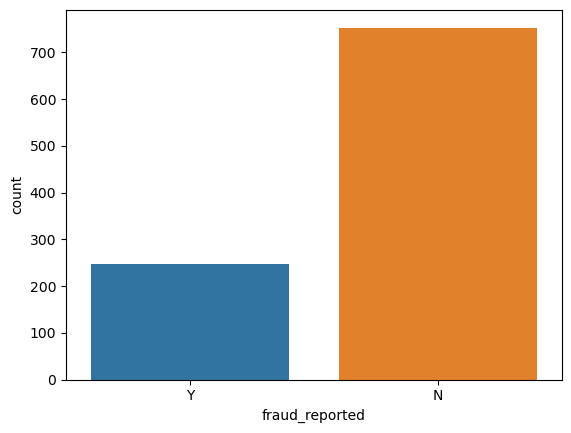

In [11]:
sns.countplot(x='fraud_reported', data=df)
plt.show()

### b. Histograms

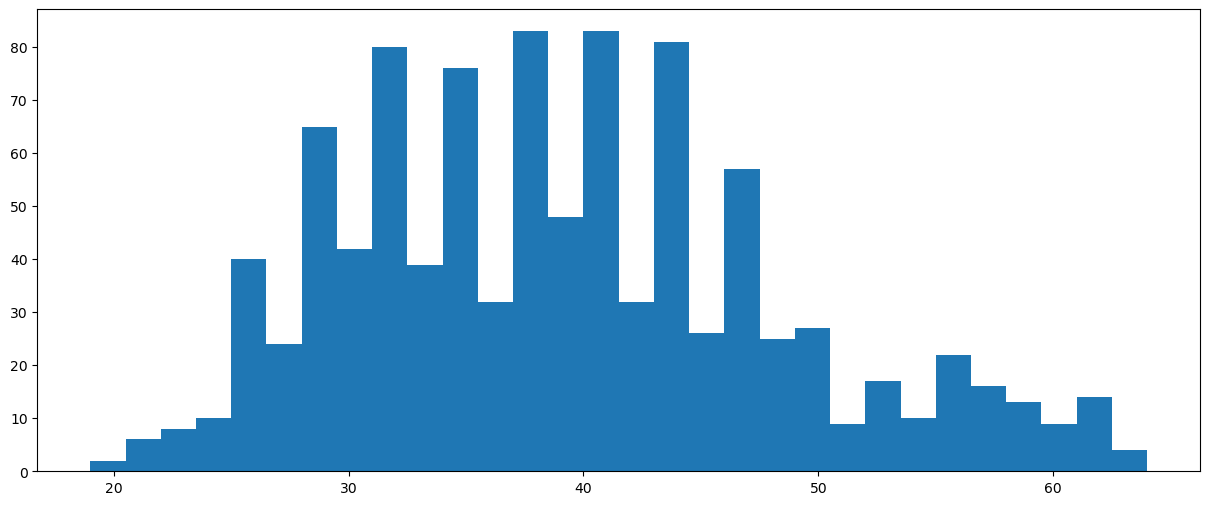

In [12]:
plt.figure(figsize=(15,6))
plt.hist(df['age'],bins=30)
plt.show()

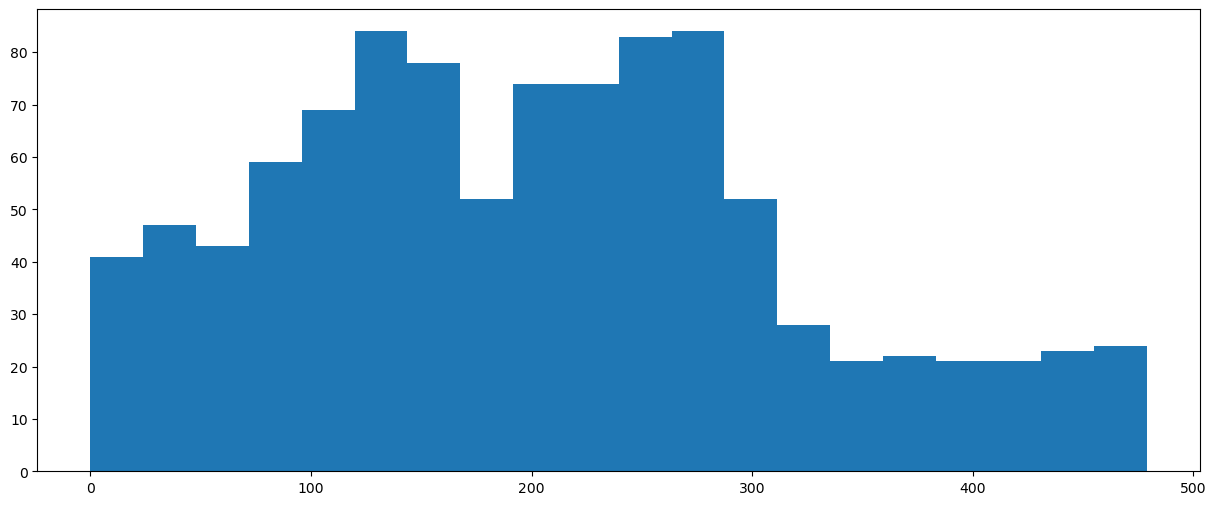

In [13]:
plt.figure(figsize=(15,6))
plt.hist(df['months_as_customer'],bins=20)
plt.show()

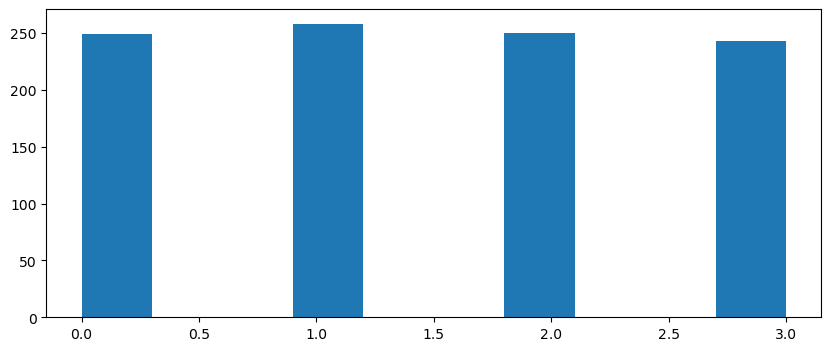

In [14]:
plt.figure(figsize=(10,4))
plt.hist(df['witnesses'],bins=10)
plt.show()

### Boxplots

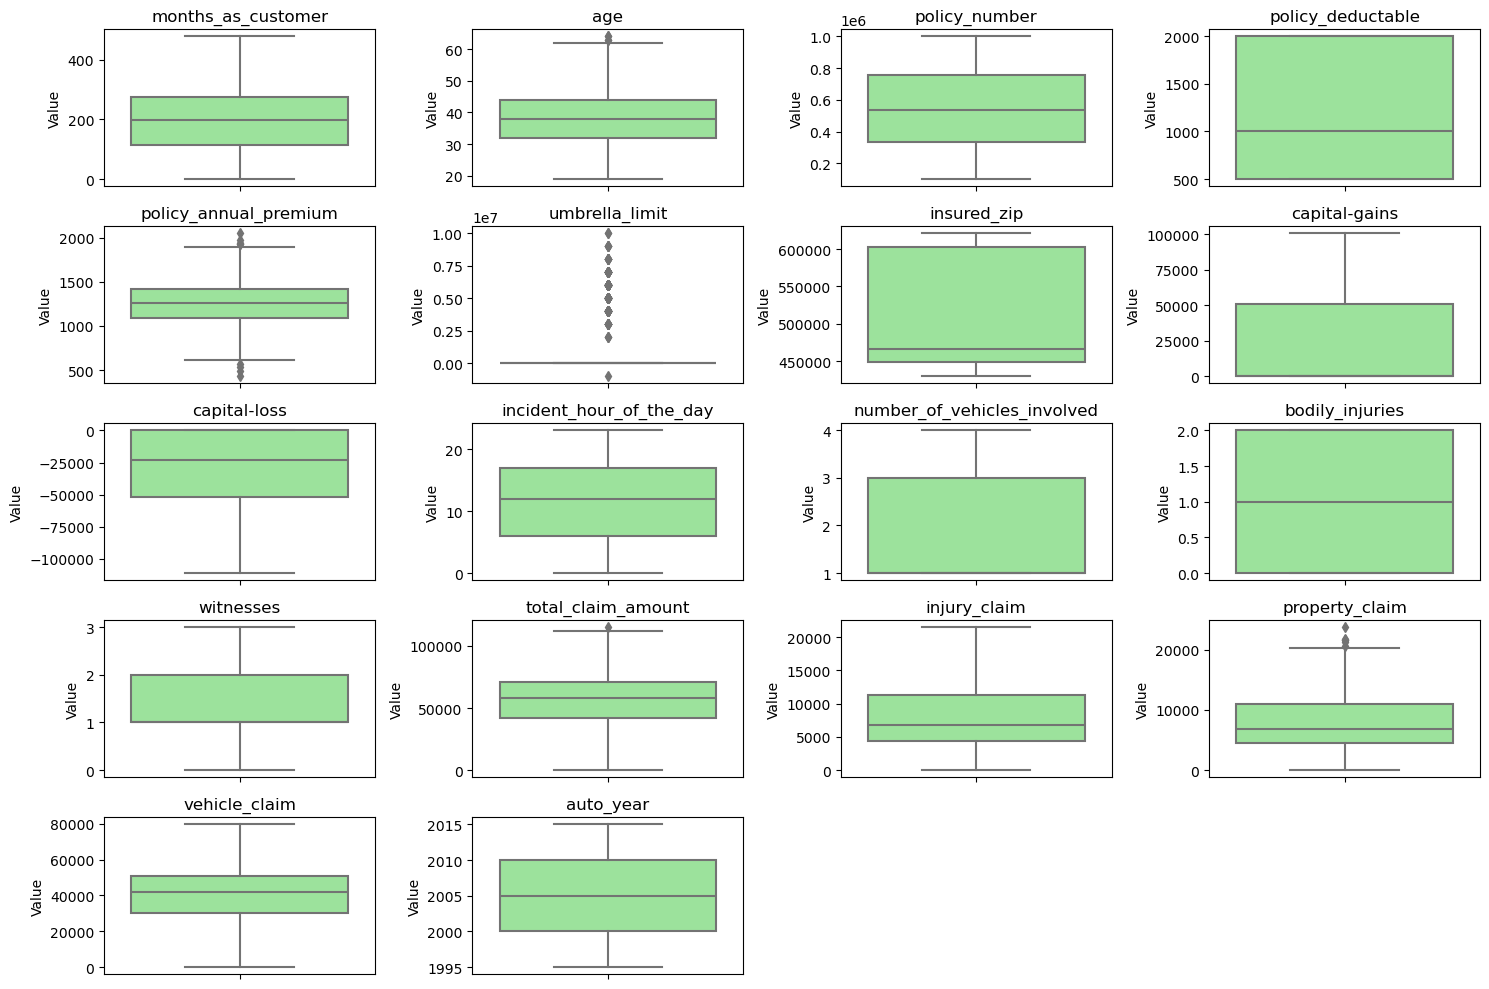

In [15]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(15, 10))

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(5, 4, i + 1)  
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(column)
    plt.ylabel('Value')

plt.tight_layout()  
plt.show()

In [16]:
df_new=df.copy()

In [17]:
df_new['fraud_reported'].head()

0    Y
1    Y
2    N
3    Y
4    N
Name: fraud_reported, dtype: object

In [18]:
def replace_values(value):
    if value == "Y":
        return 1
    else:
        return 0

# Apply the function to the 'fraud_reported' column
df_new['fraud_reported'] = df_new['fraud_reported'].apply(replace_values)


In [19]:
df_new['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

## Bivariate Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


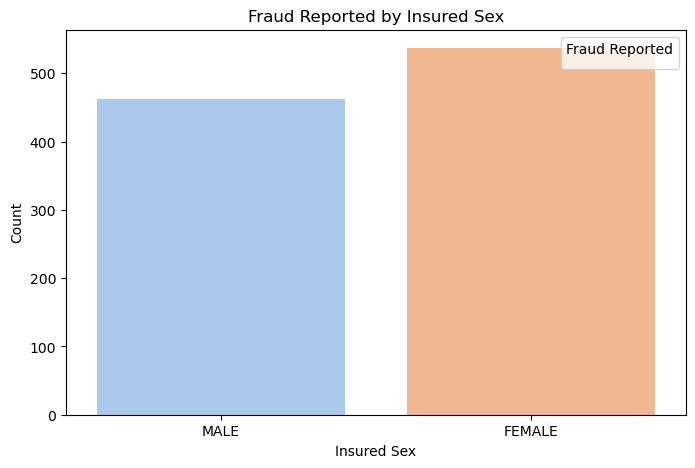

In [20]:
# Count plot for insured_sex vs. fraud_reported
plt.figure(figsize=(8, 5))
sns.countplot(x='insured_sex',  data=df_new, palette='pastel')
plt.title('Fraud Reported by Insured Sex')
plt.xlabel('Insured Sex')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()


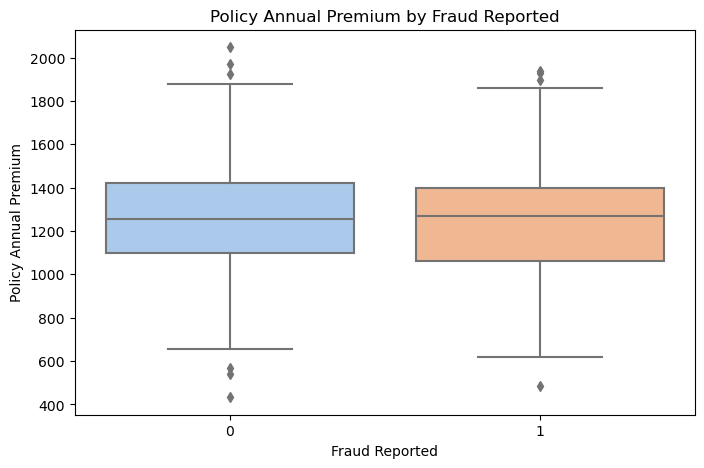

In [21]:
# Box plot for policy_annual_premium vs. fraud_reported
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_reported', y='policy_annual_premium', data=df_new, palette='pastel')
plt.title('Policy Annual Premium by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Policy Annual Premium')
plt.show()


In [22]:
corr_df= df_new.select_dtypes(include=['int64', 'float64'])
correlation= corr_df.corr()
fault_corr=correlation.sort_values(by='fraud_reported', ascending=False)
print(fault_corr)

                             months_as_customer       age  policy_number  \
fraud_reported                         0.020544  0.012143      -0.029443   
vehicle_claim                          0.061013  0.062588      -0.020184   
total_claim_amount                     0.062108  0.069863      -0.018009   
property_claim                         0.034940  0.060898      -0.010678   
injury_claim                           0.065329  0.075522      -0.008762   
umbrella_limit                         0.015498  0.018126       0.008968   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
witnesses                              0.058383  0.052359      -0.012661   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
months_as_customer                     1.000000  0.922098       0.057555   
insured_zip                            0.017895  0.025604       0.007083   
policy_deductable                      0.026807  0.029188      -0.006738   
age         

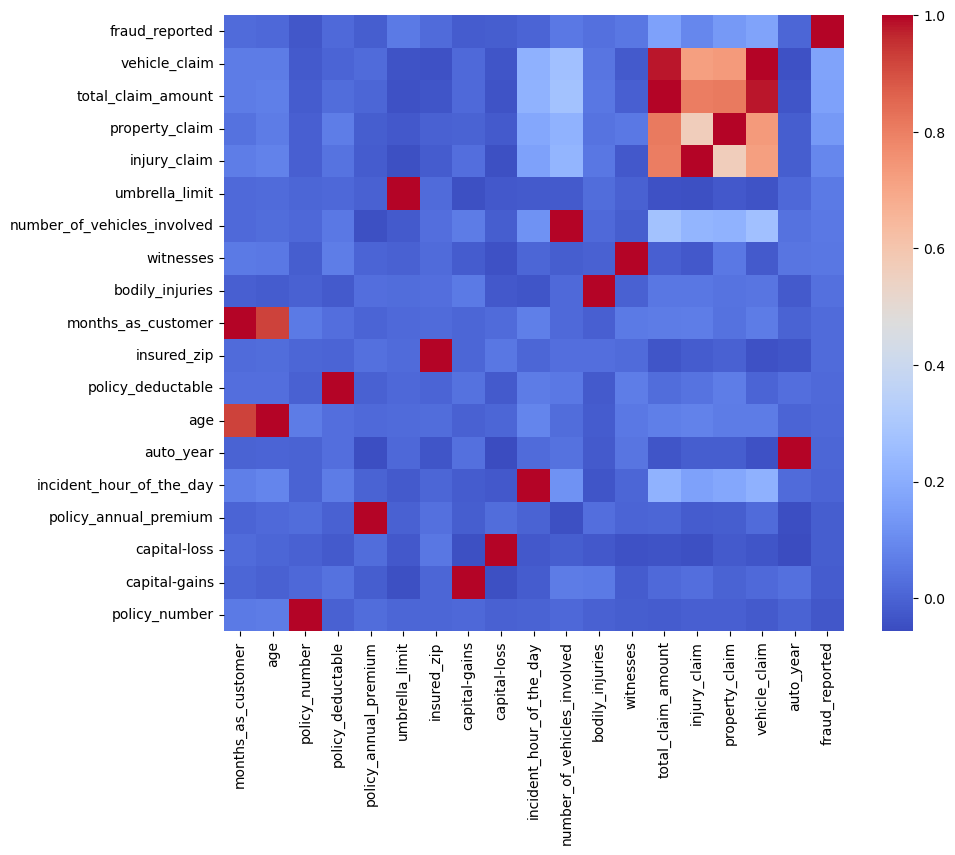

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(fault_corr,cmap='coolwarm')
plt.show()

## Normalization

### 1. Insured Education Level

In [24]:
values=df_new['insured_education_level'].unique()
print(values)

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']


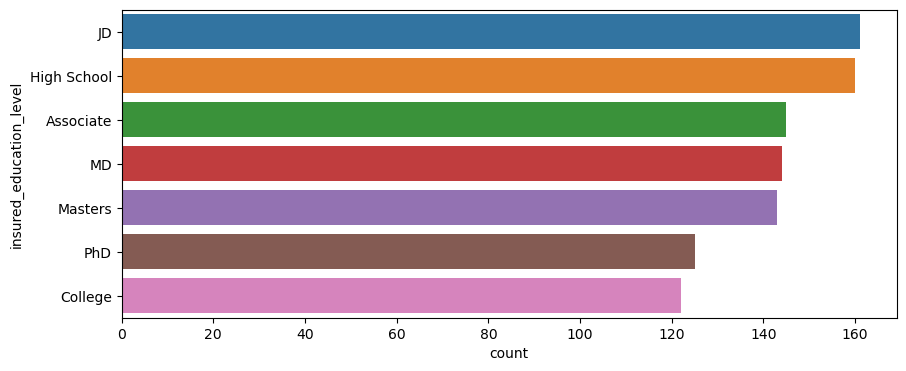

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(y='insured_education_level', data=df_new, order=df_new['insured_education_level'].value_counts().index[:7])
plt.show()

### 2.Insured Sex

In [26]:
values=df_new['insured_sex'].unique()
print(values)

['MALE' 'FEMALE']


### 3. Incident Type

In [27]:
values=df_new['incident_type'].unique()
print(values)

['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']


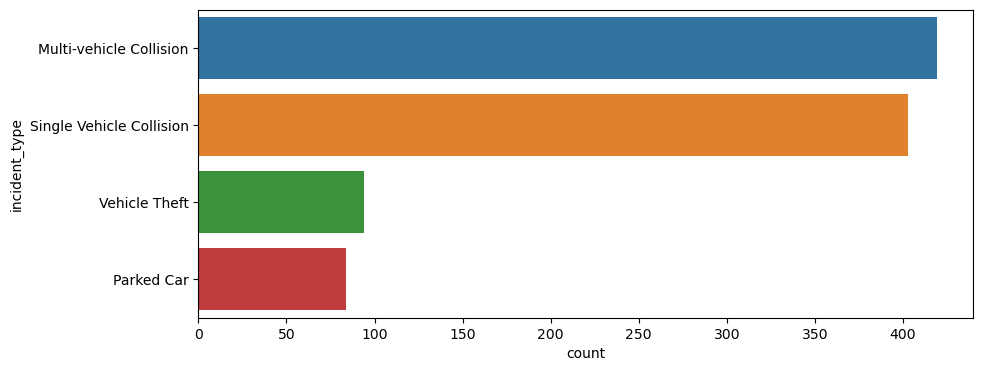

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(y='incident_type', data=df_new, order=df_new['incident_type'].value_counts().index[:7])
plt.show()

### 4. Collission Type

In [29]:
values=df_new['collision_type'].unique()
print(values)

['Side Collision' '?' 'Rear Collision' 'Front Collision']


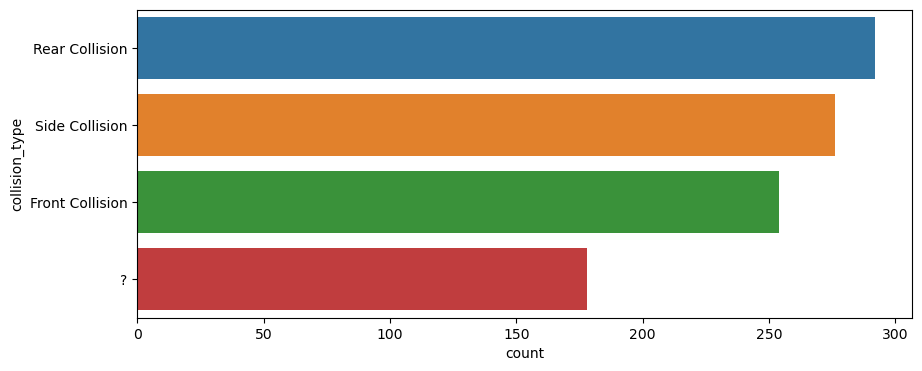

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(y='collision_type', data=df_new, order=df_new['collision_type'].value_counts().index[:7])
plt.show()

### 5. Incident Severity

In [31]:
values=df_new['incident_severity'].unique()
print(values)

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


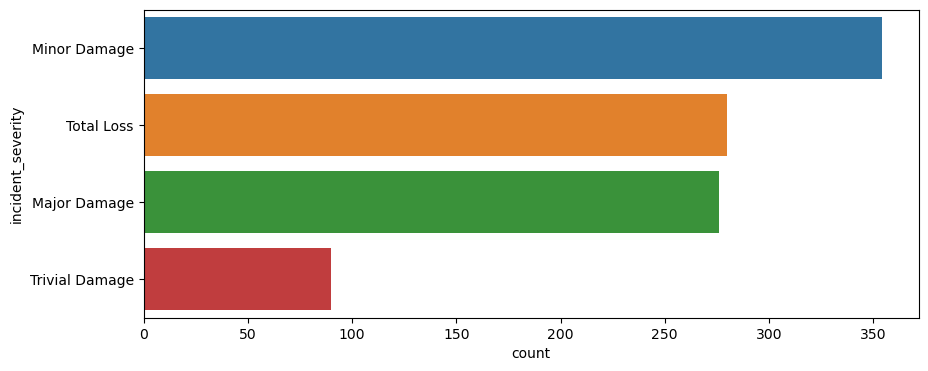

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(y='incident_severity', data=df_new, order=df_new['incident_severity'].value_counts().index[:7])
plt.show()

### 6. Property Damage

In [33]:
values=df_new['property_damage'].unique()
print(values)

['YES' '?' 'NO']


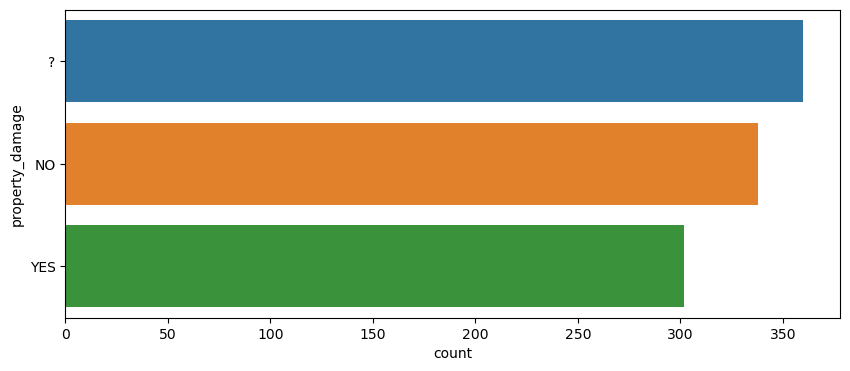

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(y='property_damage', data=df_new, order=df_new['property_damage'].value_counts().index[:7])
plt.show()

### 7. Police Report Available

In [35]:
values=df_new['police_report_available'].unique()
print(values)

['YES' '?' 'NO']


In [36]:
columns_to_normalize= [
    'insured_education_level',
    'insured_sex',
    'incident_type',
    'collision_type',
    'incident_severity',
    'property_damage',
    'police_report_available'
]

for column in columns_to_normalize:
    unique_values = df_new[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'insured_education_level':
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
Unique values in 'insured_sex':
['MALE' 'FEMALE']
Unique values in 'incident_type':
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
Unique values in 'collision_type':
['Side Collision' '?' 'Rear Collision' 'Front Collision']
Unique values in 'incident_severity':
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
Unique values in 'property_damage':
['YES' '?' 'NO']
Unique values in 'police_report_available':
['YES' '?' 'NO']


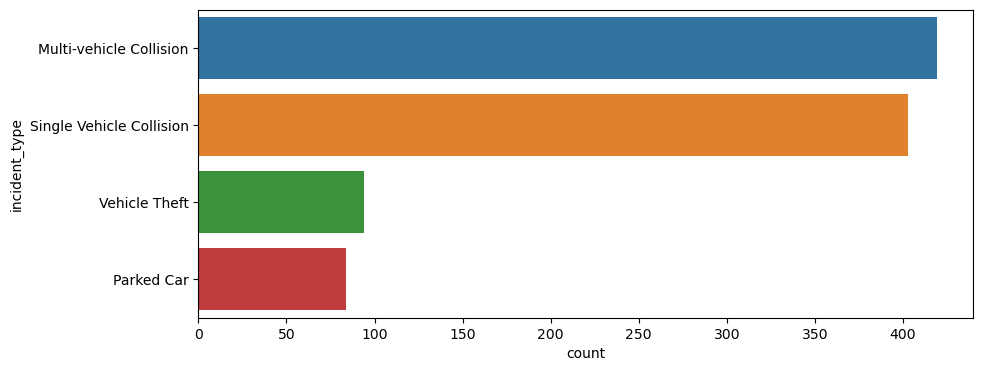

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(y='incident_type', data=df_new, order=df_new['incident_type'].value_counts().index[:7])
plt.show()

## Normalization

In [38]:
def normalize(value):
    if value == 'YES':
        return 1
    elif value == 'NO':
        return 0
    else:
        return 0.5

df_new['police_report_available']=df_new['police_report_available'].apply(normalize)

In [39]:
df_new['police_report_available'].head()

0    1.0
1    0.5
2    0.0
3    0.0
4    0.0
Name: police_report_available, dtype: float64

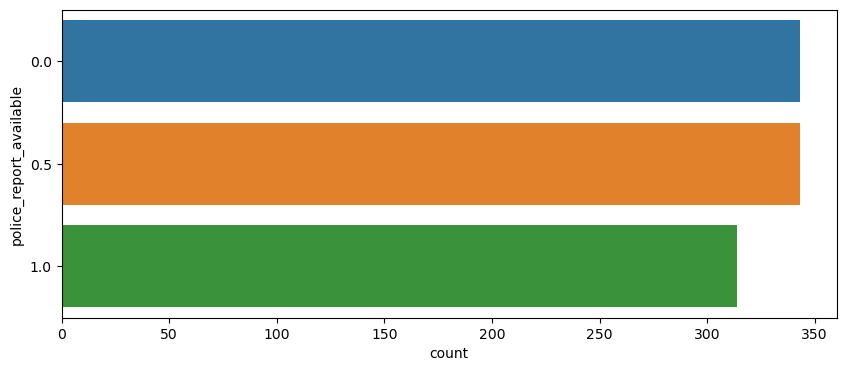

In [40]:
plt.figure(figsize=(10,4))
sns.countplot(y='police_report_available', data= df_new)
plt.show()

In [41]:
def normalize(value):
    if value == "High School":
        return 1
    elif value == "College":
        return 2
    elif value == "Associate":
        return 3
    elif value == "Masters":
        return 4
    elif value == "JD":
        return 5
    elif value == "MD":
        return 6
    elif value == "PhD":
        return 7
    else:
        return None

# Apply the function to the 'feature' column of the DataFrame
df_new['insured_education_level'] = df_new['insured_education_level'].apply(normalize)

df_new['insured_education_level'].head()

0    6
1    6
2    7
3    7
4    3
Name: insured_education_level, dtype: int64

In [42]:
incident_severity_mapping = {
    'Major Damage': 3,
    'Minor Damage': 1,
    'Total Loss': 4,
    'Trivial Damage': 2
}

df_new['incident_severity'] = df_new['incident_severity'].map(incident_severity_mapping)
df_new['incident_severity'].head()

0    3
1    1
2    1
3    3
4    1
Name: incident_severity, dtype: int64

In [43]:
property_damage_mapping = {
    'YES': 1,
    'NO': 0,
    '?': 0.5
}

df_new['property_damage']=df_new['property_damage'].map(property_damage_mapping)

df_new['property_damage'].head()

0    1.0
1    0.5
2    0.0
3    0.5
4    0.0
Name: property_damage, dtype: float64

## Final Dataset Review

In [44]:
df_new.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,3.955000,25126.100000,...,0.482000,0.992000,1.487000,0.485500,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,2.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,4.000000,0.000000,...,0.500000,1.000000,1.000000,0.500000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,6.000000,51025.000000,...,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,7.000000,100500.000000,...,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,1.984165,27872.187708,...,0.399795,0.820127,1.111335,0.405221,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483


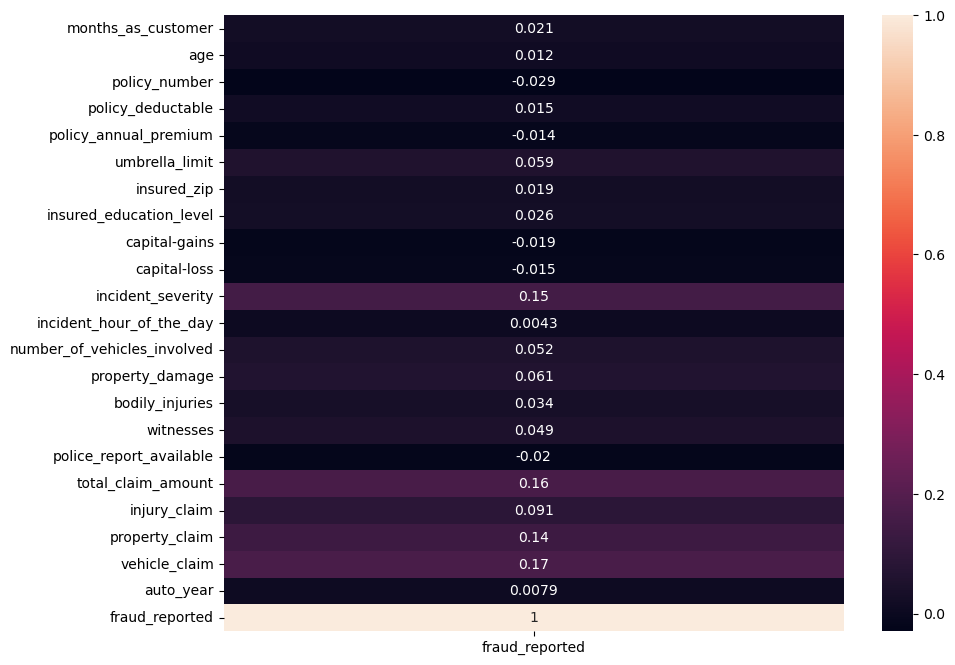

In [45]:
df_corr=df_new.select_dtypes(include=['int64','float64'])

corr=df_corr.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr[['fraud_reported']], annot=True)
plt.show()

## Final Dataset Correlation Report

In [46]:
import sweetviz as sv
report=sv.analyze(df_corr)

report.show_html('df_corr_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report df_corr_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [47]:
print(corr[['fraud_reported']])

                             fraud_reported
months_as_customer                 0.020544
age                                0.012143
policy_number                     -0.029443
policy_deductable                  0.014817
policy_annual_premium             -0.014480
umbrella_limit                     0.058622
insured_zip                        0.019368
insured_education_level            0.025857
capital-gains                     -0.019173
capital-loss                      -0.014863
incident_severity                  0.154238
incident_hour_of_the_day           0.004316
number_of_vehicles_involved        0.051839
property_damage                    0.060616
bodily_injuries                    0.033877
witnesses                          0.049497
police_report_available           -0.019571
total_claim_amount                 0.163651
injury_claim                       0.090975
property_claim                     0.137835
vehicle_claim                      0.170049
auto_year                       

# Training the Model

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
X= df_corr.drop('fraud_reported', axis=1)
y=df_corr['fraud_reported']

In [52]:
X.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,6,53300,0,...,1,1.0,1,2,1.0,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,6,0,0,...,1,0.5,0,0,0.5,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,7,35100,0,...,3,0.0,2,3,0.0,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,7,48900,-62400,...,1,0.5,1,2,0.0,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,3,66000,-46000,...,1,0.0,0,1,0.0,6500,1300,650,4550,2009


In [53]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [61]:
X_train.shape

(800, 22)